In [2]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.utils.vis_utils import plot_model




In [28]:
# 创建数据集
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)


if __name__ == '__main__':
    # 加载数据
    dataframe = read_csv('D://毕业设计//Data//Forecasting//USA_1day.csv', usecols=[2], engine='python', skipfooter=3)
    dataset = dataframe.values
    # 将整型变为float
    dataset = dataset.astype('float32')

    # 数据处理，归一化至0~1之间
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # 划分训练集和测试集
    train_size = int(len(dataset) * 0.8)
    test_size = len(dataset) - train_size
    train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]

    # 创建测试集和训练集
    look_back = 1
    trainX, trainY = create_dataset(train, look_back)  # 单步预测
    testX, testY = create_dataset(test, look_back)

    # 调整输入数据的格式
    trainX = numpy.reshape(trainX, (trainX.shape[0], look_back, trainX.shape[1]))  # （样本个数，1，输入的维度）
    testX = numpy.reshape(testX, (testX.shape[0], look_back, testX.shape[1]))

    # 创建LSTM神经网络模型
    model = Sequential()
    model.add(LSTM(120, input_shape=(trainX.shape[1], trainX.shape[2])))  # 输入维度为1，时间窗的长度为1，隐含层神经元节点个数为120
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
    m = model.evaluate(testX, testY)
    print(m)
    
#   # 绘制网络结构
# #     plot_model(model, to_file='D://毕业设计//result//预测//LSTM//model.png', show_shapes=True);

    # 预测
    trainPredict = model.predict(trainX)
    testPredict = model.predict(testX)

    testScore = math.sqrt(mean_squared_error(testY, testPredict[:,0]))
    print('Test Score:',testScore)
    from sklearn import metrics
    print('Test MAE:',metrics.mean_absolute_error(testY, testPredict[:, 0]))
#     # 反归一化
    trainPredict = scaler.inverse_transform(trainPredict)
    trainY = scaler.inverse_transform([trainY])
    testPredict = scaler.inverse_transform(testPredict)
    testY = scaler.inverse_transform([testY])
    
#     predict = testPredict
    predict=trainPredict[:, 0]
    actual = testY[0]


Epoch 1/100
202/202 - 2s - loss: 0.1038 - 2s/epoch - 8ms/step
Epoch 2/100
202/202 - 0s - loss: 0.0071 - 228ms/epoch - 1ms/step
Epoch 3/100
202/202 - 0s - loss: 3.2730e-04 - 247ms/epoch - 1ms/step
Epoch 4/100
202/202 - 0s - loss: 2.5967e-04 - 231ms/epoch - 1ms/step
Epoch 5/100
202/202 - 0s - loss: 2.4764e-04 - 230ms/epoch - 1ms/step
Epoch 6/100
202/202 - 0s - loss: 2.2927e-04 - 234ms/epoch - 1ms/step
Epoch 7/100
202/202 - 0s - loss: 2.4282e-04 - 235ms/epoch - 1ms/step
Epoch 8/100
202/202 - 0s - loss: 2.0946e-04 - 268ms/epoch - 1ms/step
Epoch 9/100
202/202 - 0s - loss: 1.8436e-04 - 227ms/epoch - 1ms/step
Epoch 10/100
202/202 - 0s - loss: 1.7342e-04 - 244ms/epoch - 1ms/step
Epoch 11/100
202/202 - 0s - loss: 1.7294e-04 - 240ms/epoch - 1ms/step
Epoch 12/100
202/202 - 0s - loss: 1.3786e-04 - 235ms/epoch - 1ms/step
Epoch 13/100
202/202 - 0s - loss: 1.2612e-04 - 248ms/epoch - 1ms/step
Epoch 14/100
202/202 - 0s - loss: 1.1968e-04 - 232ms/epoch - 1ms/step
Epoch 15/100
202/202 - 0s - loss: 1.0511

In [3]:
# trainPredict = scaler.inverse_transform(trainPredict)
# trainY = scaler.inverse_transform([trainY])
# testPredict = scaler.inverse_transform(testPredict)
# testY = scaler.inverse_transform([testY])
# print(testY)
# print(testPredict[:, 0])

In [29]:
# trainY=trainY
# testY=testY
# # 计算得分
import pandas as pd
print(testPredict[:, 0])
data = pd.DataFrame(testPredict)

writer = pd.ExcelWriter('D://毕业设计//Data//Forecasting//result//DEU.xlsx')		# 写入Excel文件
data.to_excel(writer, 'page_1', float_format='%.5f')		# ‘page_1’是写入excel的sheet名
writer.save()

writer.close()

# testPredict.savetxt('D://毕业设计//Data//Forecasting//result//DEU.csv', train_x, delimiter = ',')

# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
# print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(testY, testPredict[:, 0]))
 
from sklearn.metrics import mean_squared_error
print('RMSE:',math.sqrt(mean_squared_error(testY, testPredict[:, 0])))


[29381.703 29381.703 29456.973 29456.973 29456.973 29456.973 29456.973
 29456.973 29456.973 29456.973 29456.973 29456.973 29456.973 29456.973
 29456.973 29470.906 29470.906 29483.91  29495.057 29495.057 29495.057
 29495.057 29495.057 29495.057 29540.564 29540.564 29540.564 29540.564
 29540.564 29564.705 29644.54  29644.54  29652.89  29652.89  29652.89
 29652.89  29687.227 29687.227 29706.71  29711.354 29711.354 29711.354
 29711.354 29711.354 29730.834 29749.387 29768.865 29768.865 29768.865
 29774.43 ]


<ipython-input-29-4e395e50a426>:8: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  writer = pd.ExcelWriter('D://毕业设计//Data//Forecasting//result//DEU.xlsx')		# 写入Excel文件
<ipython-input-29-4e395e50a426>:10: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


ValueError: Found input variables with inconsistent numbers of samples: [1, 50]

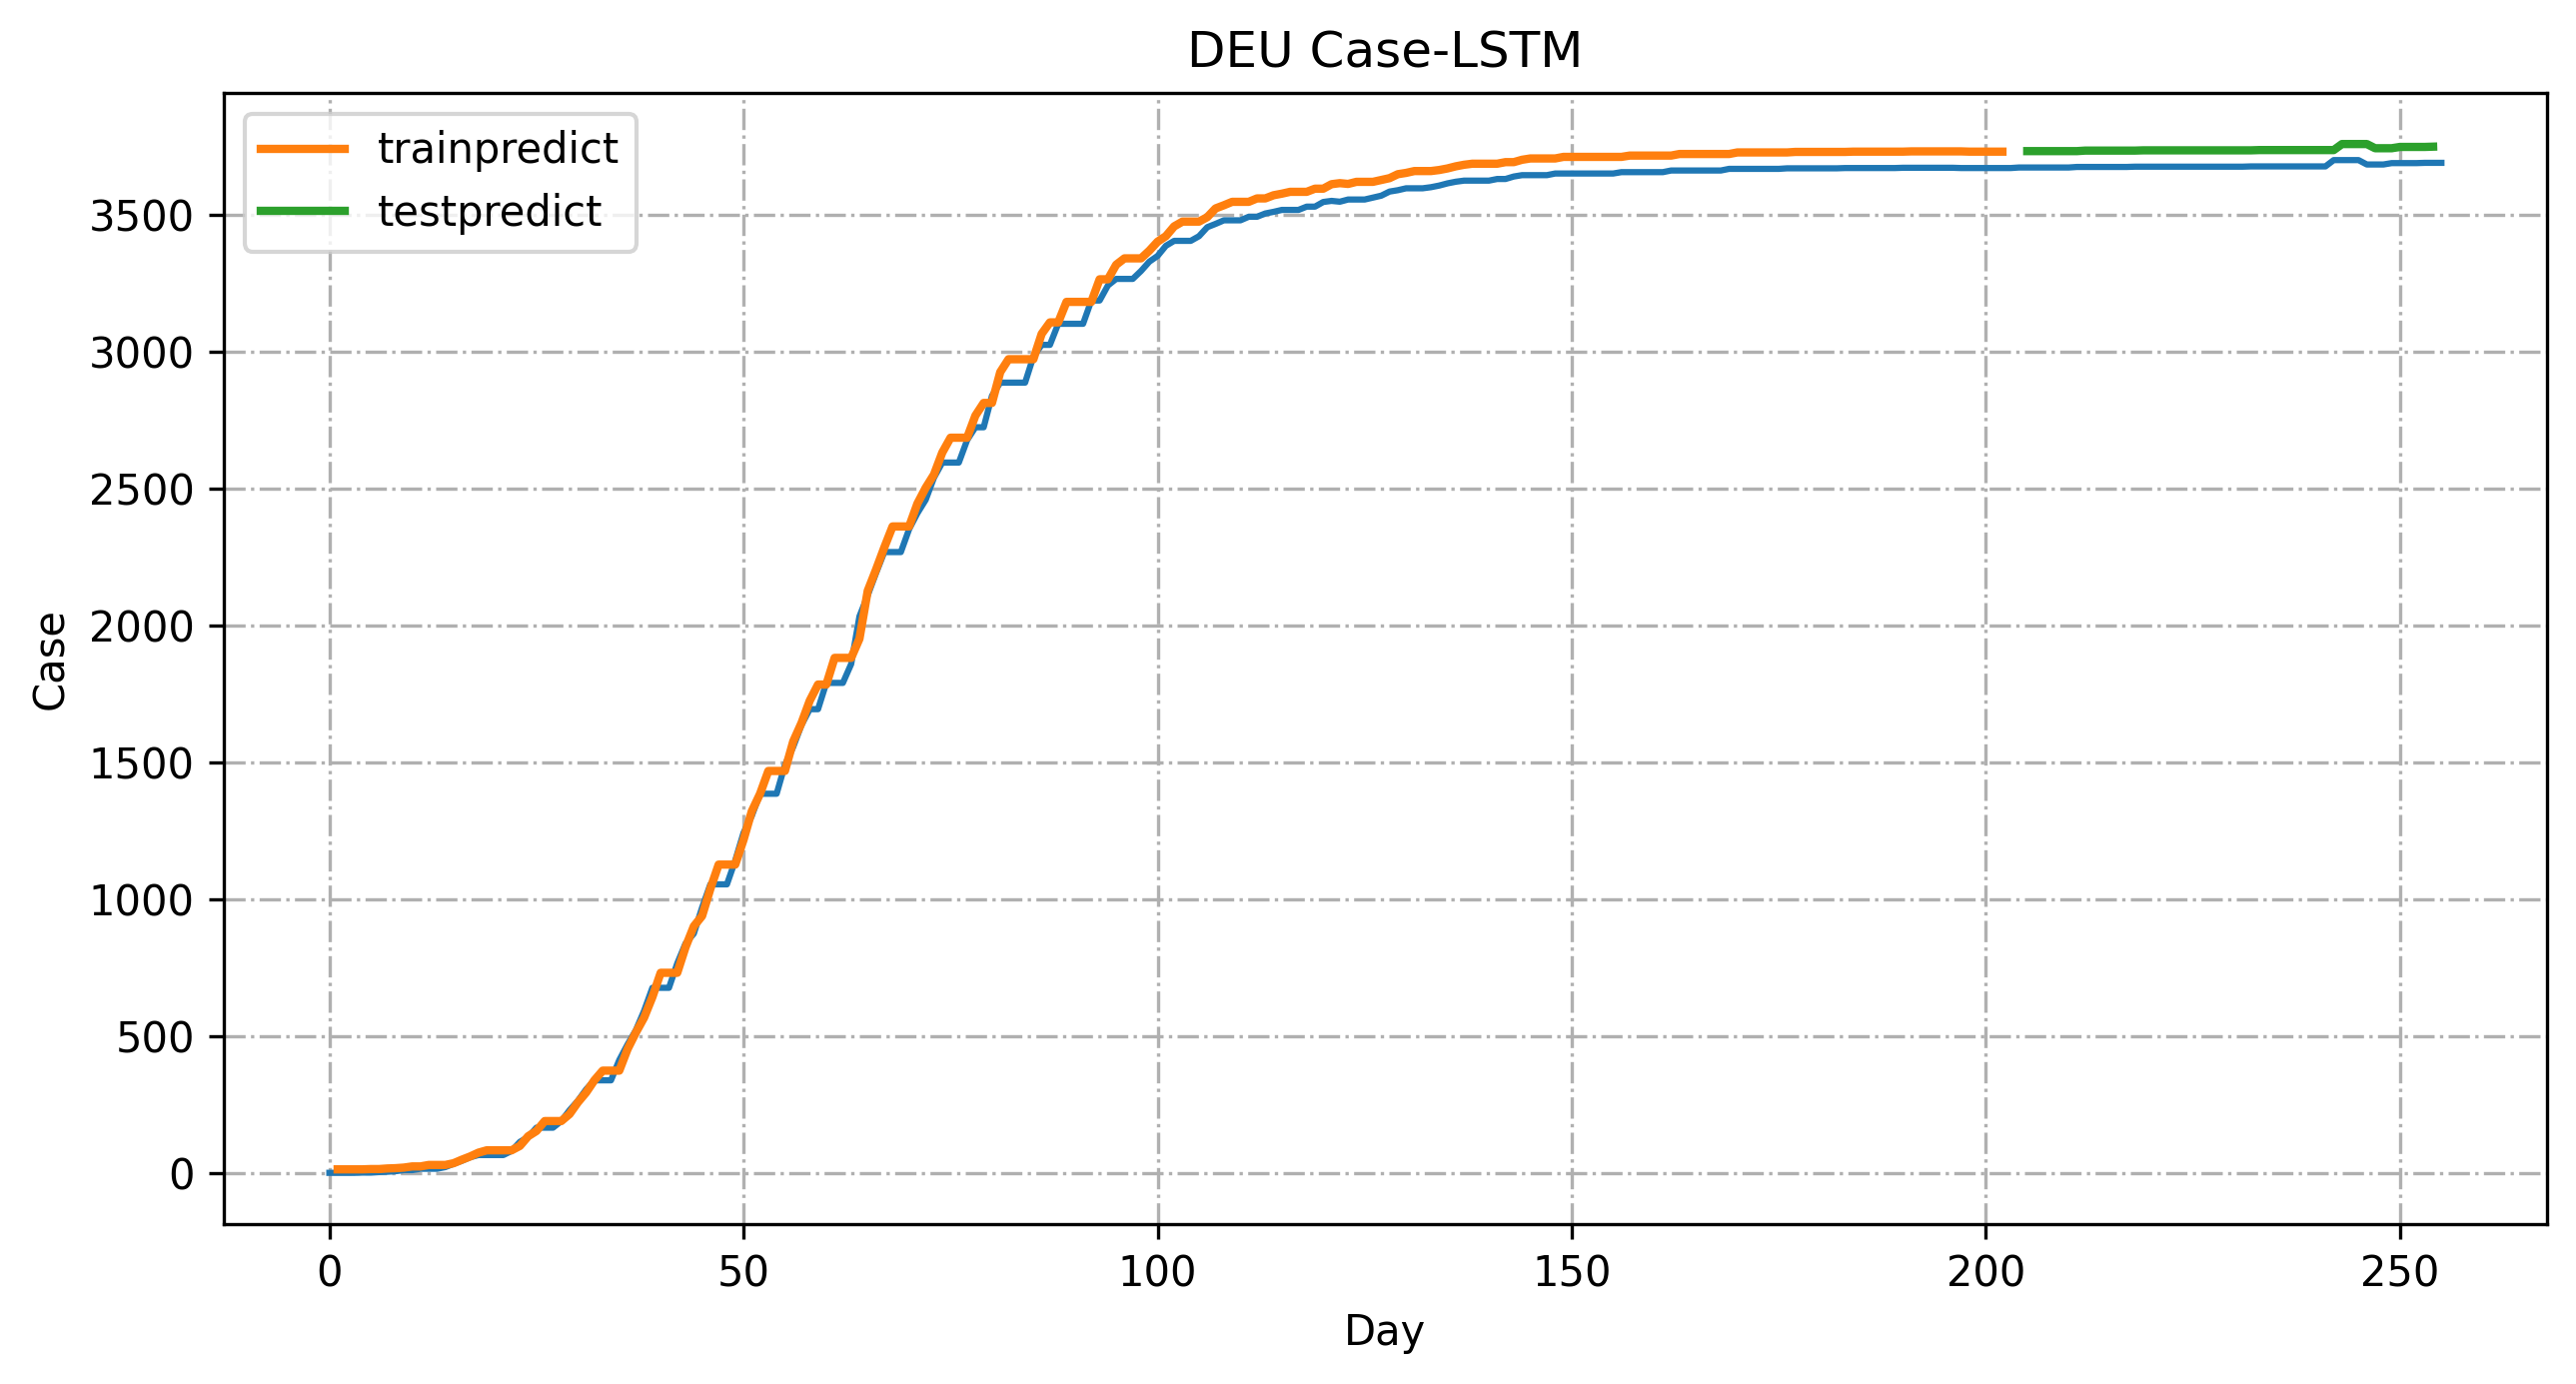

In [32]:
# # 绘图
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict
fig, ax = plt.subplots(figsize=(10,5),dpi = 300)
plt.plot(scaler.inverse_transform(dataset))
# plt.plot(trainPredictPlot)
# plt.plot(testPredictPlot)
# plt.show();
ax.plot( trainPredictPlot, linewidth=2.0,label = "trainpredict")
ax.plot( testPredictPlot, linewidth=2.0,label = "testpredict")
ax.legend(loc=2);
plt.xlabel('Day')
plt.ylabel('Case')
# plt.ylim((0, 10))
plt.grid(linestyle='-.')
plt.title('DEU Case-LSTM')
plt.savefig("D://毕业设计//result//预测//LSTM//DEU Case.png",bbox_inches = 'tight')
#             bbox_inches ="tight",
            
#             orientation ='landscape')

plt.show()

